In [2]:
# import libraries
import pandas as pd

In [8]:
# load dataset
df = pd.read_csv('D:/project/retail_sales_enriched_with_coordinates.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,City,Region,Country,Occupation,Income Level,Membership Type,Latitude,Longitude
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Boston,West,USA,Salesperson,Medium,VIP,42.3601,-71.0589
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Houston,Midwest,USA,Lawyer,Medium,New Customer,29.7604,-95.3698
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,San Francisco,Northeast,USA,Business Analyst,Low,VIP,37.7749,-122.4194
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Boston,Northeast,USA,Student,Low,New Customer,42.3601,-71.0589
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Chicago,Northeast,USA,Student,Medium,VIP,41.8781,-87.6298


In [10]:
# Check for missing values
print(df.isnull().sum())

# result: there is no null value in the dataset

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
City                0
Region              0
Country             0
Occupation          0
Income Level        0
Membership Type     0
Latitude            0
Longitude           0
dtype: int64


In [12]:
# Drop duplicates
df = df.drop_duplicates()

In [14]:
df.dtypes

# Result: Date must be datatime format

Transaction ID        int64
Date                 object
Customer ID          object
Gender               object
Age                   int64
Product Category     object
Quantity              int64
Price per Unit        int64
Total Amount          int64
City                 object
Region               object
Country              object
Occupation           object
Income Level         object
Membership Type      object
Latitude            float64
Longitude           float64
dtype: object

In [16]:
#Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

In [18]:
# Verify categorical data consistency:
print(df["Income Level"].unique())  
print(df["Membership Type"].unique())  
print(df["Occupation"].unique())  

['Medium' 'Low' 'High']
['VIP' 'New Customer' 'Regular']
['Salesperson' 'Lawyer' 'Business Analyst' 'Student' 'Teacher' 'Artist'
 'Engineer' 'Doctor']


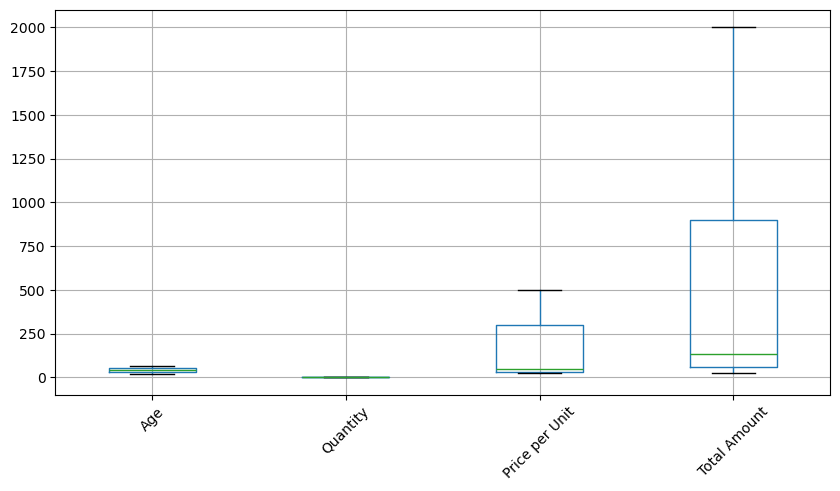

In [20]:
# Check for outliers in numerical data
# Look at Age, Quantity, Price per Unit, Total Amount for outliers using boxplots
import seaborn as sns  
import matplotlib.pyplot as plt  

numeric_cols = ["Age", "Quantity", "Price per Unit", "Total Amount"]  
df[numeric_cols].boxplot(figsize=(10,5))  
plt.xticks(rotation=45)  
plt.show()
# result
# boxplot indicates outliers in several numerical columns:
# Age – Minor outliers, but not extreme. Likely a few customers with unusually high or low ages.
# Quantity – No significant outliers, values appear to be well-distributed.
# Price per Unit – Clear outliers, indicating some products are significantly more expensive than others.
# Total Amount – Major outliers, suggesting a few transactions had exceptionally high total values.

In [22]:
# Identify Outlier Thresholds
import numpy as np

# Define function to detect outliers using IQR
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check outliers for Total Amount
outliers_total_amount = detect_outliers("Total Amount")
print(f"Total Amount Outliers: {len(outliers_total_amount)} rows")

#result: 
# there are 0 outliers detected in the Total Amount column using the IQR method, it means:
# The values in Total Amount are within a reasonable range based on IQR.
# The extreme values seen in the boxplot might still be naturally occurring high values, not true outliers.

Total Amount Outliers: 0 rows


In [24]:
# save dataframe after clean
df.to_csv('D:/project/retail_sales_clean.csv')